In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import pandas_techinal_indicators as ta 

In [3]:
avocado_df = pd.read_csv('Project/Future-Product-Price-Predictor-Fbprophet/avocado.csv')

In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
avocado_df = avocado_df.sort_values('Date')

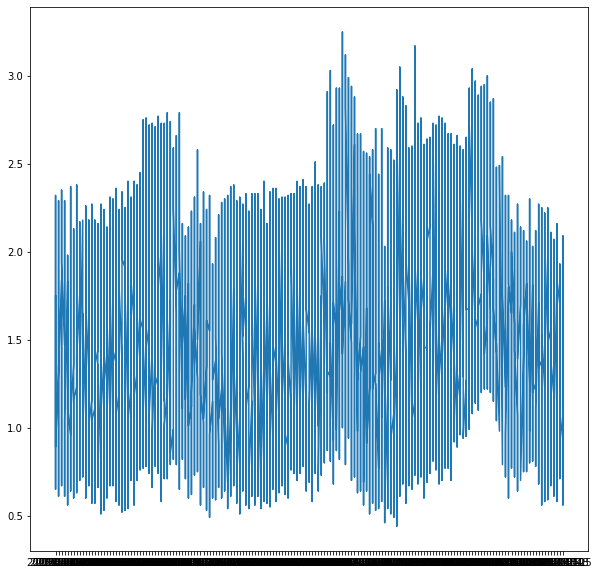

In [10]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

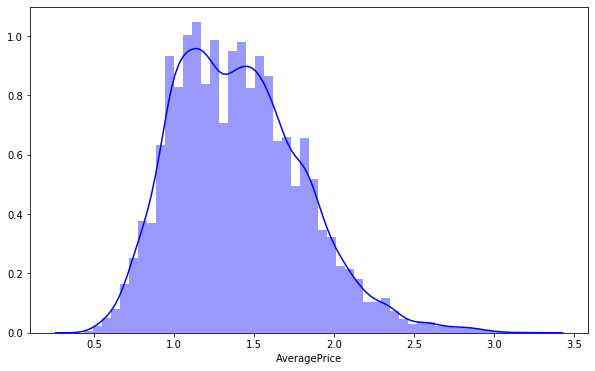

In [11]:
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'], color='b')

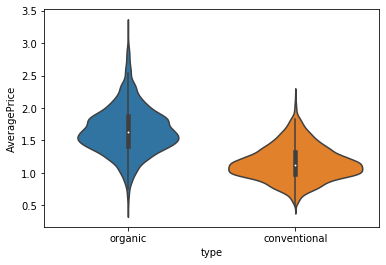

In [13]:
sns.violinplot(y='AveragePrice',x='type',data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

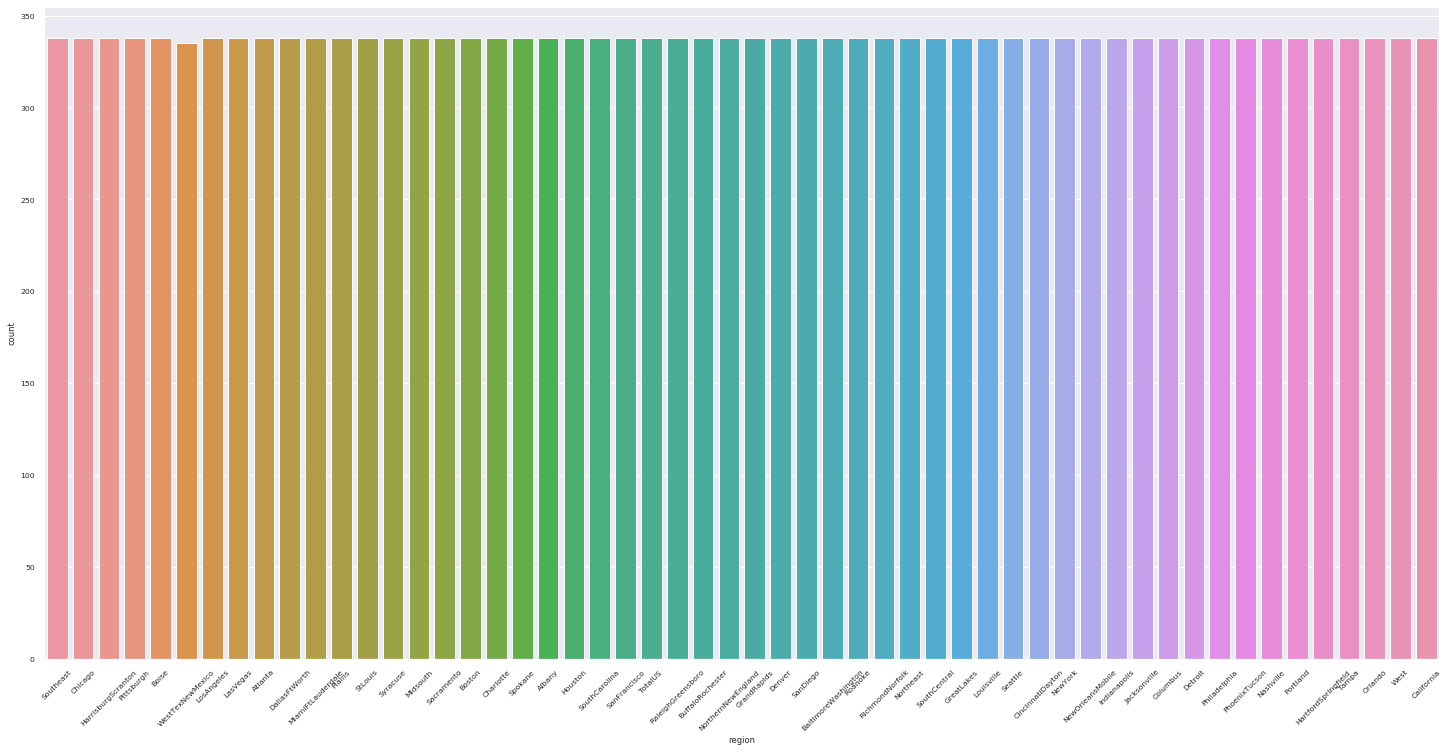

In [14]:
sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

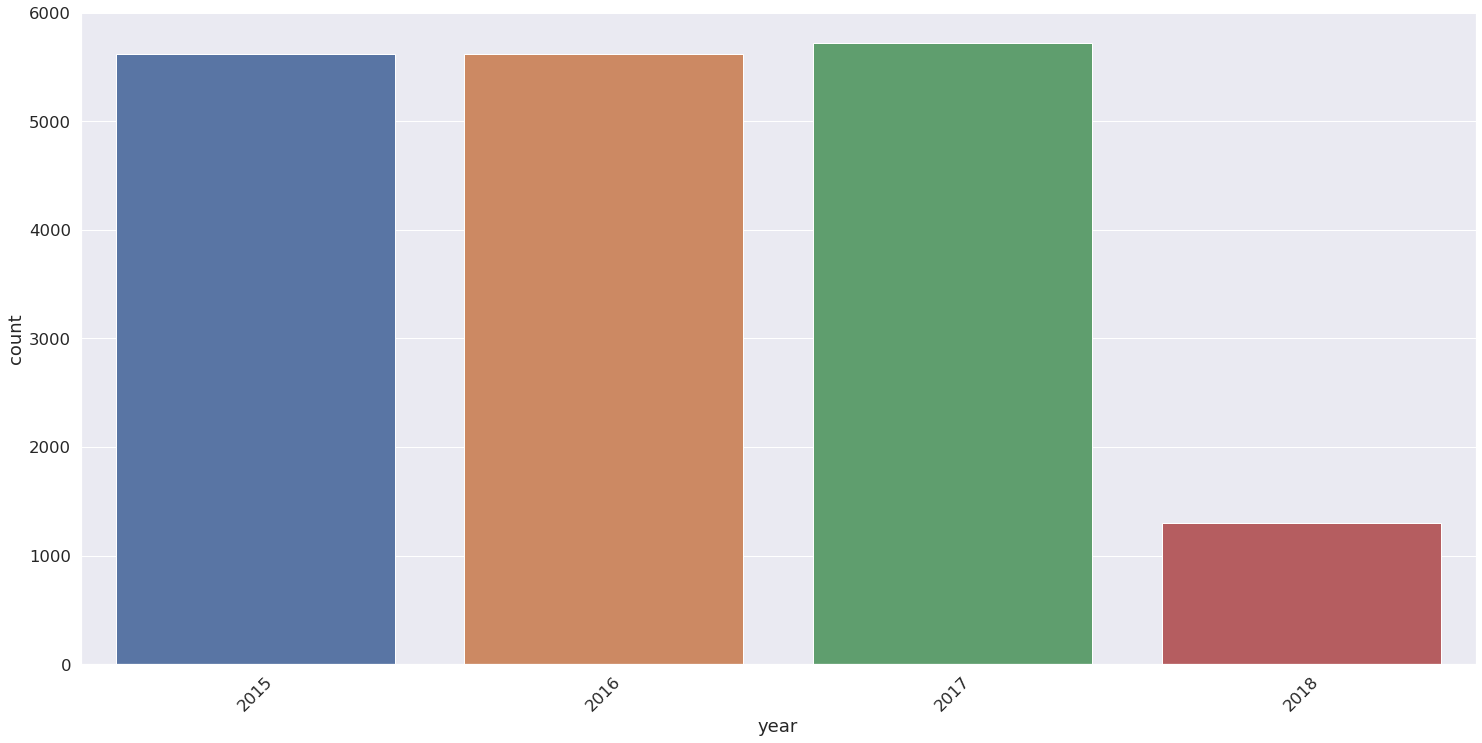

In [15]:
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

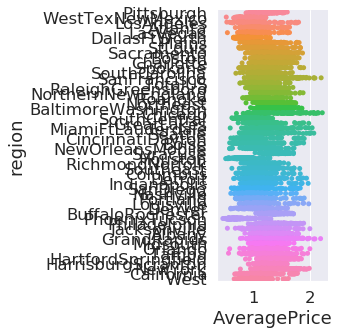

In [19]:
conventional = sns.catplot('AveragePrice','region', data=avocado_df[avocado_df['type']=='conventional'])
hue='year',
height = 20

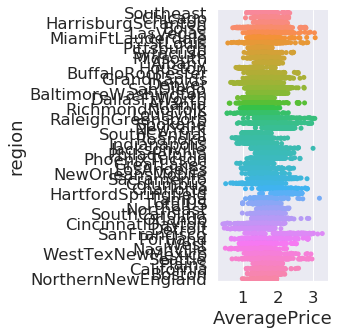

In [20]:
organic = sns.catplot('AveragePrice','region', data=avocado_df[avocado_df['type']=='organic'])
hue='year',
height = 20

In [21]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [22]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [23]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [24]:
model = Prophet()

In [25]:
model.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.884274,1.875446,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.873598,1.900195,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.911692,1.858348,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.883768,1.851231,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.894171,1.859766,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161789,0.540602,1.602927,0.996716,1.336079,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,0.0,0.0,0.0,1.075605
18610,2019-03-22,1.161059,0.579926,1.593624,0.995543,1.336673,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,0.0,0.0,0.0,1.076534
18611,2019-03-23,1.160328,0.552981,1.574785,0.994243,1.336662,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,0.0,0.0,0.0,1.077735
18612,2019-03-24,1.159597,0.550062,1.604102,0.991221,1.336514,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,0.0,0.0,0.0,1.079190


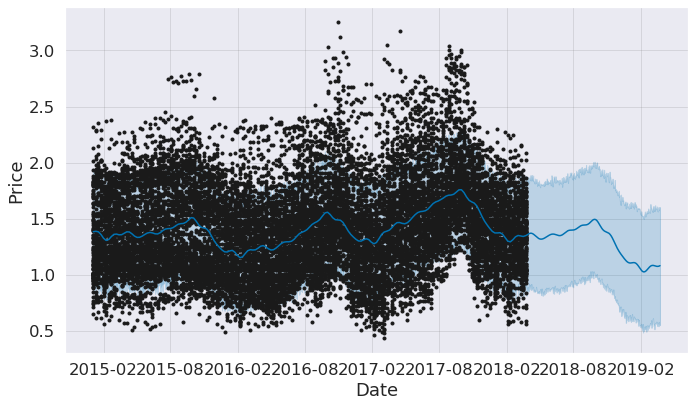

In [29]:
figure = model.plot(forecast,xlabel = 'Date', ylabel = 'Price')

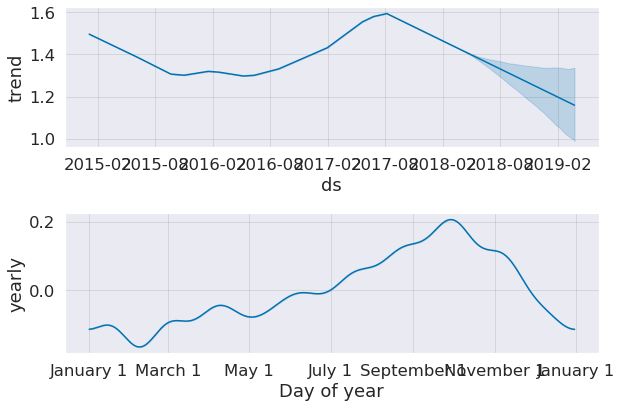

In [30]:
figure2 = model.plot_components(forecast)

In [31]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [32]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


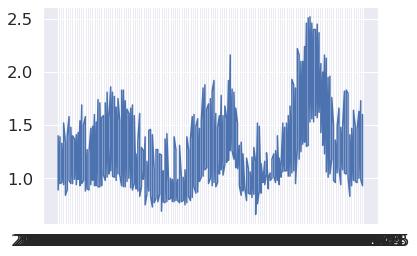

In [33]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [34]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [35]:
model = Prophet()
model.fit(avocado_df_sample)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287303,0.668534,1.507877,1.287303,1.287303,-0.187629,-0.187629,-0.187629,-0.187629,-0.187629,-0.187629,0.0,0.0,0.0,1.099674
1,2015-01-04,1.287303,0.668683,1.532435,1.287303,1.287303,-0.187629,-0.187629,-0.187629,-0.187629,-0.187629,-0.187629,0.0,0.0,0.0,1.099674
2,2015-01-11,1.285054,0.694599,1.552140,1.285054,1.285054,-0.171569,-0.171569,-0.171569,-0.171569,-0.171569,-0.171569,0.0,0.0,0.0,1.113485
3,2015-01-11,1.285054,0.706239,1.511436,1.285054,1.285054,-0.171569,-0.171569,-0.171569,-0.171569,-0.171569,-0.171569,0.0,0.0,0.0,1.113485
4,2015-01-18,1.282805,0.677289,1.573239,1.282805,1.282805,-0.163012,-0.163012,-0.163012,-0.163012,-0.163012,-0.163012,0.0,0.0,0.0,1.119793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.724189,1.122354,1.966208,1.692823,1.759070,-0.207148,-0.207148,-0.207148,-0.207148,-0.207148,-0.207148,0.0,0.0,0.0,1.517041
699,2019-03-22,1.724748,1.099301,1.962903,1.693270,1.759742,-0.202142,-0.202142,-0.202142,-0.202142,-0.202142,-0.202142,0.0,0.0,0.0,1.522606
700,2019-03-23,1.725306,1.080794,1.982358,1.693717,1.760414,-0.196569,-0.196569,-0.196569,-0.196569,-0.196569,-0.196569,0.0,0.0,0.0,1.528737
701,2019-03-24,1.725865,1.095939,1.969554,1.694165,1.761132,-0.190534,-0.190534,-0.190534,-0.190534,-0.190534,-0.190534,0.0,0.0,0.0,1.535330


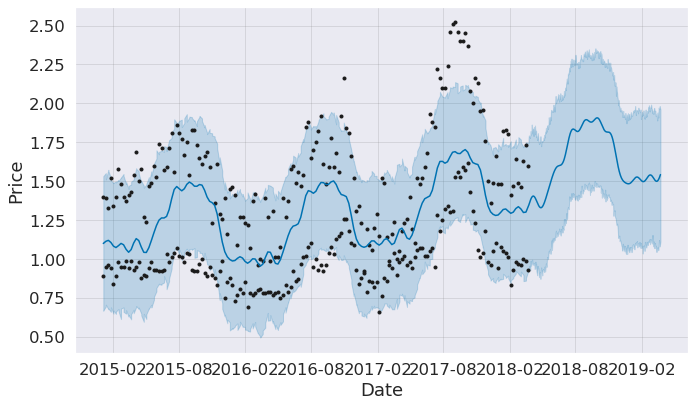

In [37]:
figure = model.plot(forecast,xlabel = 'Date', ylabel = 'Price')

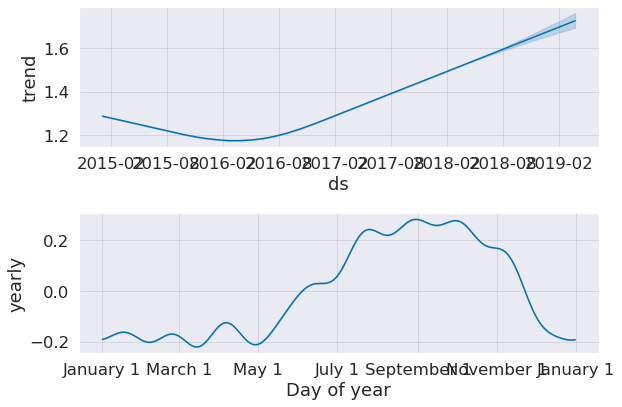

In [38]:
figure2 = model.plot_components(forecast)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
raw_data = pd.read_csv('CIPLA.csv')

In [4]:
raw_data.head(2)

,N,Symbol,Series,Date,Prev Close,Open,High,Low,Last,Close,Average,Volume,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,CIPLA,EQ,01-Jan-15,626.4,626.5,634.80,626.50,629.95,628.40,630.72,596787,376407400.6,9333,201185,33.71
1,1,CIPLA,EQ,02-Jan-15,628.4,633.0,637.55,629.35,631.00,630.15,632.96,688999,436107243.0,11080,332082,48.20


In [5]:
del(raw_data['Series'])
del(raw_data['Date'])
del(raw_data['Symbol'])
del(raw_data['N'])

In [6]:
raw_data2 = pd.read_csv('CADILAHC.csv')

del(raw_data2['Series'])
del(raw_data2['Date'])
del(raw_data2['Symbol'])
del(raw_data2['N'])

In [7]:
raw_data3 = pd.read_csv('DRREDDY.csv')

del(raw_data3['Series'])
del(raw_data3['Date'])
del(raw_data3['Symbol'])
del(raw_data3['N'])

In [8]:
raw_data4 = pd.read_csv('LUPIN.csv')

del(raw_data4['Series'])
del(raw_data4['Date'])
del(raw_data4['Symbol'])
del(raw_data4['N'])

In [10]:
raw_data5 = pd.read_csv('SUNPHARMA.csv')

del(raw_data5['Series'])
del(raw_data5['Date'])
del(raw_data5['Symbol'])
del(raw_data5['N'])

In [11]:
# Function for exponentially smoothing

def exp_smoothing(df, alpha):
    es_data = df.ewm(alpha=alpha).mean()    
    return es_data

In [12]:
# For current testing purposes, value of alpha used is 0.9

sdata = exp_smoothing(raw_data, 0.9)
sdata2 = exp_smoothing(raw_data2, 0.9)
sdata3 = exp_smoothing(raw_data3, 0.9)
sdata4 = exp_smoothing(raw_data4, 0.9)
sdata5 = exp_smoothing(raw_data5, 0.9)
# Let us visualise the data

sdata.head() 

,Prev Close,Open,High,Low,Last,Close,Average,Volume,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,626.400000,626.500000,634.800000,626.500000,629.950000,628.400000,630.720000,5.967870e+05,3.764074e+08,9333.000000,201185.000000,33.710000
1,628.218182,632.409091,637.300000,629.090909,630.904545,629.990909,632.756364,6.806161e+05,4.306800e+08,10921.181818,320182.272727,46.882727
2,629.958559,626.635135,637.930631,626.306306,632.251802,632.701802,633.417297,1.223210e+06,7.748409e+08,21567.864865,652569.414414,53.042432
3,632.696130,630.563906,632.592529,612.079208,615.778533,616.183528,621.124500,1.576297e+06,9.785972e+08,53017.131413,956747.259226,60.483987
4,616.184448,615.971245,619.279120,605.257853,616.067856,612.373315,612.462363,8.901653e+05,5.458053e+08,36130.144271,429642.354874,47.079265


In [13]:
def feature_extraction(data):
    for x in [5, 14, 26, 44, 66]:
        data = ta.relative_strength_index(data, n=x)
        data = ta.stochastic_oscillator_d(data, n=x)
        data = ta.accumulation_distribution(data, n=x)
        data = ta.average_true_range(data, n=x)
        data = ta.momentum(data, n=x)
        data = ta.money_flow_index(data, n=x)
        data = ta.rate_of_change(data, n=x)
        data = ta.on_balance_volume(data, n=x)
        data = ta.commodity_channel_index(data, n=x)
        data = ta.ease_of_movement(data, n=x)
        data = ta.trix(data, n=x)
        data = ta.vortex_indicator(data, n=x)
        data = ta.moving_average(data, n=x)
        data = ta.standard_deviation(data, n=x) 
        data = ta.keltner_channel(data, n=x)
        data = ta.coppock_curve(data, n=x)
        data = ta.force_index(data, n=x)
        data = ta.bollinger_bands(data, n=x)
        data = ta.exponential_moving_average(data, n=x)
    
    data = ta.ppsr(data)
    data = ta.stochastic_oscillator_k(data)
    data = ta.mass_index(data)
    data = ta.ultimate_oscillator(data)
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema14'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()
    data = ta.chaikin_oscillator(data)    
         
    data = ta.macd(data, n_fast=12, n_slow=26)
    
    del(data['Open'])
    del(data['Prev Close'])
    del(data['High'])
    del(data['Low'])
    del(data['Volume'])
    del(data['Last'])
    del(data['Average'])
    del(data['Turnover'])
    del(data['No. of Trades'])
    del(data['Deliverable Qty'])
    del(data['% Dly Qt to Traded Qty'])
    
    return data
   
def compute_prediction_int(df, n):
    pred = (df.shift(-n)['Close'] >= df['Close'])
    pred = pred.iloc[:-n]
    return pred.astype(int)

def prepare_data(df, horizon):
    data = feature_extraction(df).dropna().iloc[:-horizon]
    data['pred'] = compute_prediction_int(data, n=horizon)
    del(data['Close'])
    return data.dropna()

In [14]:
data = prepare_data(sdata, 1)
print('data done')
data2 = prepare_data(sdata2, 1)
print('data2 done')
data3 = prepare_data(sdata3, 1)
print('data3 done')
data4 = prepare_data(sdata4, 1)
print('data4 done')
data5 = prepare_data(sdata5, 1)
print('data5 done')


## Identifying and extracting the label
data2 = data2.add_suffix('_2')
data3 = data3.add_suffix('_3')
data4 = data4.add_suffix('_4')
data5 = data5.add_suffix('_5')

print('suffixes added')


data = pd.concat([data, data2], axis=1)
data = pd.concat([data, data3], axis=1)
data = pd.concat([data, data4], axis=1)
data = pd.concat([data, data5], axis=1)

## Extracting the input features and creating the input feature matrix

data = data.dropna()
del(data['pred_2'])
del(data['pred_3'])
del(data['pred_4'])
del(data['pred_5'])

input_feature = [x for x in data.columns if x not in ['gain', 'pred']]
X = data[input_feature]
y = data['pred']

#print("This is X: ")
#print(X)
#print("This is y: ")
#print(y)

data done
data2 done
data3 done
data4 done
data5 done
suffixes added


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

#print("This is X_new: ")
#print(X_new)

In [16]:
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X_new):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_new[train_index, :], X_new[test_index,:]
    
for train_index, test_index in tscv.split(y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## Printing sizes to verify correctness
print('len X_train', len(X_train))
print('len y_train', len(y_train))
print('len X_test', len(X_test))
print('len y_test', len(y_test))

len X_train 852
len y_train 852
len X_test 283
len y_test 283


C:\Users\SAMARTH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:784: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [17]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=111, random_state=42)

## @EVERYONE - Try playing with the parameters above - increasing number of estimators may help improving accuracy

In [23]:
model.fit(X_train, y_train.values.ravel());
print("model fitted")
prediction = model.predict(X_test)
print("prediction created")
print(np.size(prediction))
print(np.size(y_test))

accuracy = accuracy_score(y_pred=prediction, y_true=y_test)

print('Accuracy: {0:1.2f}'.format(accuracy))


confusion = confusion_matrix(y_pred=prediction, y_true=y_test)
print('Confusion Matrix')
print(confusion)


precision = precision_score(y_pred=prediction, y_true=y_test)
recall = recall_score(y_pred=prediction, y_true=y_test)
f1 = f1_score(y_pred=prediction, y_true=y_test)
print('Precision: {0:1.2f}, Recall: {1:1.2f}, f1: {2:1.2f}'.format(precision, recall, f1))


model fitted
prediction created
189
189
Accuracy: 0.63
[[70 33]
 [37 49]]
Precision: 0.68, Recall: 0.65, f1: 0.66


In [24]:
from sklearn import svm
# model = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

model = svm.SVC()

model.fit(X_train, y_train.values.ravel());
print("model fitted")
prediction = model.predict(X_test)
print("prediction created")
print(np.size(prediction))
print(np.size(y_test))

accuracy = accuracy_score(y_pred=prediction, y_true=y_test)

print('Accuracy: {0:1.2f}'.format(accuracy))


confusion = confusion_matrix(y_pred=prediction, y_true=y_test)
print('Confusion Matrix')
print(confusion)


precision = precision_score(y_pred=prediction, y_true=y_test)
recall = recall_score(y_pred=prediction, y_true=y_test)
f1 = f1_score(y_pred=prediction, y_true=y_test)
print('Precision: {0:1.2f}, Recall: {1:1.2f}, f1: {2:1.2f}'.format(precision, recall, f1))

model fitted
prediction created
283
283
Accuracy: 0.65
[[98 11]
 [60 25]]
Precision: 0.89, Recall: 0.62, f1: 0.73
